# Detect yellow taxi using Custom Vision API


# Request 4 parameters:
* Image file directory
* Prediction-Key
* Content-Type
* projectId

In [1]:
# set parameters
Image_file_directory = "/home/junjiecai/argo_groundwork/ETL_scripts/Images/40.736178520505_-74.00352731985085_360.png"
Prediction_Key = '9c9942a1bc5e4226a28101bc38e87d1d'
Content_Type = 'application/octet-stream'
projectId = '51f1e733-1a74-4c08-85e9-19851feda644'

In [2]:
import os
import json
import http.client, urllib.request, urllib.parse, urllib.error, base64
from IPython.display import Image

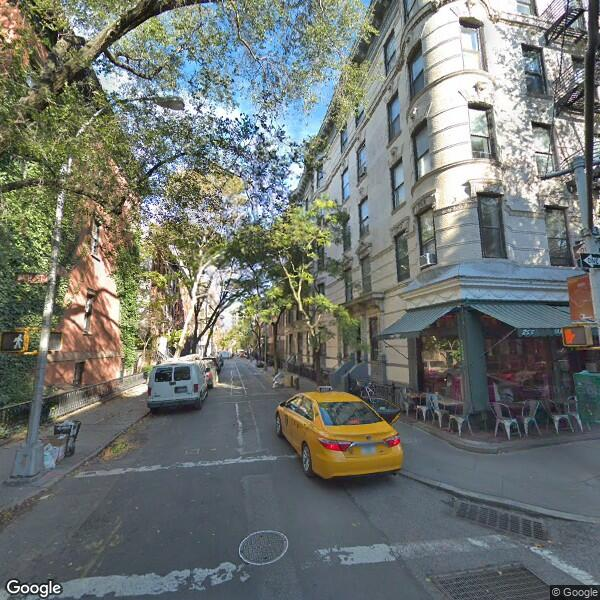

In [3]:
img_file = Image_file_directory
Image(filename=img_file)

In [10]:
# refer to CustomVision documents: https://southcentralus.dev.cognitive.microsoft.com/docs/services/450e4ba4d72542e889d93fd7b8e960de/operations/5a6264bc40d86a0ef8b2c290

def Custom_Vision_Prediction(img_file):
    ########### Image file Python 3.2 #############
    headers = {
        # Request headers
        'Prediction-Key': Prediction_Key,
        'Content-Type': Content_Type,
        'Prediction-key': '{subscription key}',
    }

    params = urllib.parse.urlencode({
        # Request parameters
        'iterationId': '{}',
        'application': '{}',
    })

    try:
        with open(img_file, 'rb') as img:
            conn = http.client.HTTPSConnection('southcentralus.api.cognitive.microsoft.com')
            #conn.request("POST", "/customvision/v2.0/Prediction/{projectId}/image?%s" % params, "{body}", headers)
            conn.request("POST", "/customvision/v2.0/Prediction/" + projectId + "/image?%s" % params, img, headers)
            response = conn.getresponse()
            data = response.read()
            return json.loads(data)
            conn.close()
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))

In [13]:
data = Custom_Vision_Prediction(img_file)
display(data)

{'id': '2cfea1bf-eb69-4675-bb2a-b7cadf65ba36',
 'project': '51f1e733-1a74-4c08-85e9-19851feda644',
 'iteration': '0d1e406d-7408-475c-b149-0795da25b682',
 'created': '2019-01-23T21:00:29.2530808Z',
 'predictions': [{'probability': 0.784951,
   'tagId': '08f64316-031e-4402-801d-af4993a63331',
   'tagName': 'YellowTaxi',
   'boundingBox': {'left': 0.445408016,
    'top': 0.6289322,
    'width': 0.245103568,
    'height': 0.186881185}},
  {'probability': 0.0169557184,
   'tagId': '08f64316-031e-4402-801d-af4993a63331',
   'tagName': 'YellowTaxi',
   'boundingBox': {'left': 0.244582057,
    'top': 0.6767458,
    'width': 0.696773648,
    'height': 0.319325984}}]}

In [14]:
for pred in data['predictions']:
    tag, prob = pred['tagName'], pred['probability']
    print(tag, prob)

YellowTaxi 0.784951
YellowTaxi 0.0169557184
